# Des affichages utiles pour les DataFrames

Quelques affichages avec des outils de sélection adaptés.

In [1]:
import numpy as np
import pandas as pd
#import sys
#sys.path.append("..")  # ou "." si lancé depuis la racine
import tabata as tbt

In [2]:
%reload_ext autoreload
%autoreload 2

## Récupération d'un DataFrame exemple

In [3]:
storename = "data/in/AFL1EB.h5"
ds = tbt.Opset(storename)

In [4]:
df = ds[4]
df.head()

ALT[m]     Tisa[K]  TAS[m/s]       Vz[m/s]  \
record_04                                                           
2012-08-03 01:24:00 -7.607808  830.008941       0.0 -5.884575e-16   
2012-08-03 01:24:01 -7.607808  830.008941       0.0 -5.631412e-16   
2012-08-03 01:24:02 -7.607808  830.008941       0.0 -5.378249e-16   
2012-08-03 01:24:03 -7.607808  830.008941       0.0 -5.125086e-16   
2012-08-03 01:24:04 -7.607808  830.008941       0.0 -4.871922e-16   

                        Masse[kg]  F[N]  
record_04                                
2012-08-03 01:24:00  14637.674998   0.0  
2012-08-03 01:24:01  14637.674998   0.0  
2012-08-03 01:24:02  14637.674998   0.0  
2012-08-03 01:24:03  14637.674998   0.0  
2012-08-03 01:24:04  14637.674998   0.0

## Affichage simplifié des DataFrames
Deux fonction simplifient l'affichage d'un opset.

* `selplot(df,[variable])`affiche un DataFrame variable par variable.
* `byunitplot(df,[yunit],[xunit],[title])` affiche le DataFrame en sélectionnant les variables, unité par unité sur le même graphe.
* `groupplot(df,standardize)` superposition de courbes.
* `doubleplot(df1,df2|col)` affichage lié de deux graphes empilés.

### Affichage des courbes une à une.
On peut préciser une partie du nom de la variable.

In [5]:
import plotly.io as pio

In [6]:
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'vscode'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [14]:
tbt.selplot(df,"V")

interactive(children=(Dropdown(description='Variable :', index=3, options=('ALT[m]', 'Tisa[K]', 'TAS[m/s]', 'V…

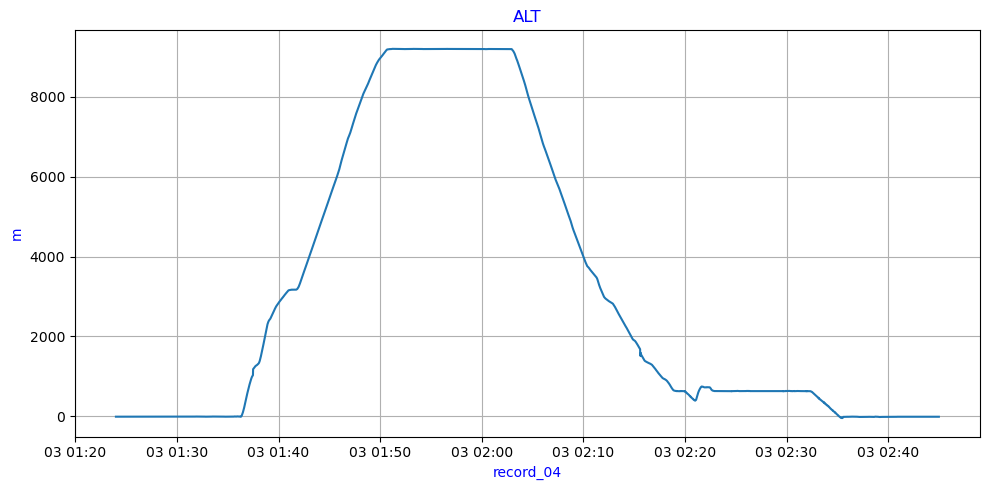

In [8]:
tbt.selplot_matplotlib(df, variable="ALT")

In [ ]:
tbt.selplotc(df,"V")

interactive(children=(Dropdown(description='Variable :', index=3, options=('ALT[m]', 'Tisa[K]', 'TAS[m/s]', 'V…

##### Les fonctions selplot et selplotc sont identiques lorsqu'elles sont réécrites (car absence de widget), je n'écris donc qu'une des deux. 

### Affichage par unité

In [15]:
tbt.byunitplot(df,'m/s')

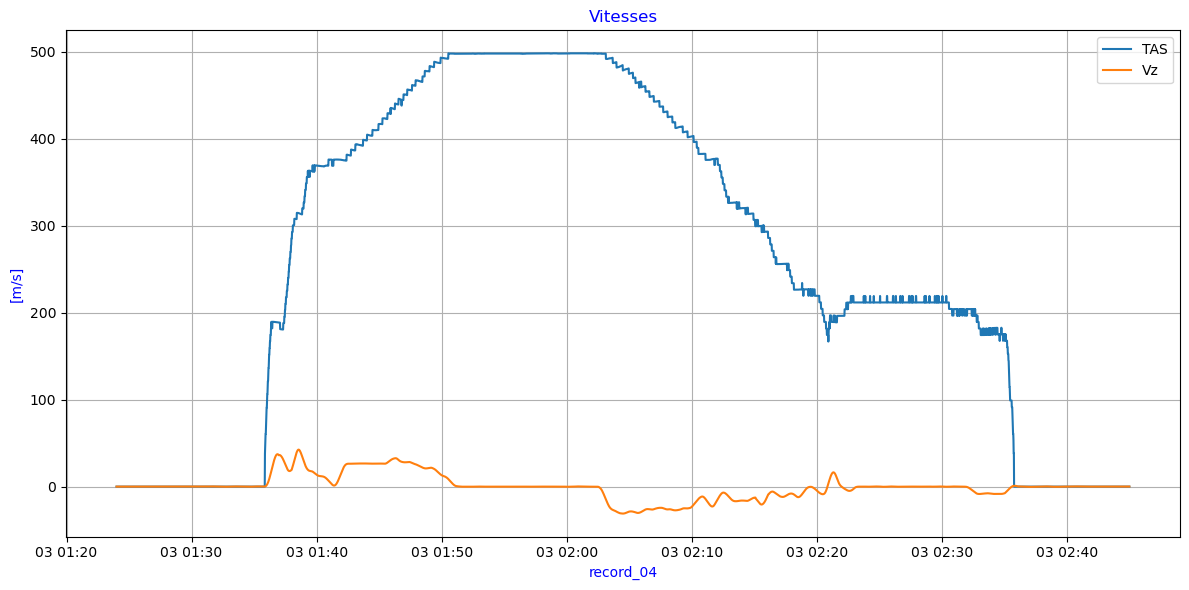

In [16]:
tbt.byunitplot_matplotlib(df, yunit="m/s", title="Vitesses")

### Affichage de toutes les variables sur le même axe.

In [17]:
tbt.groupplot(df,standardize=True)

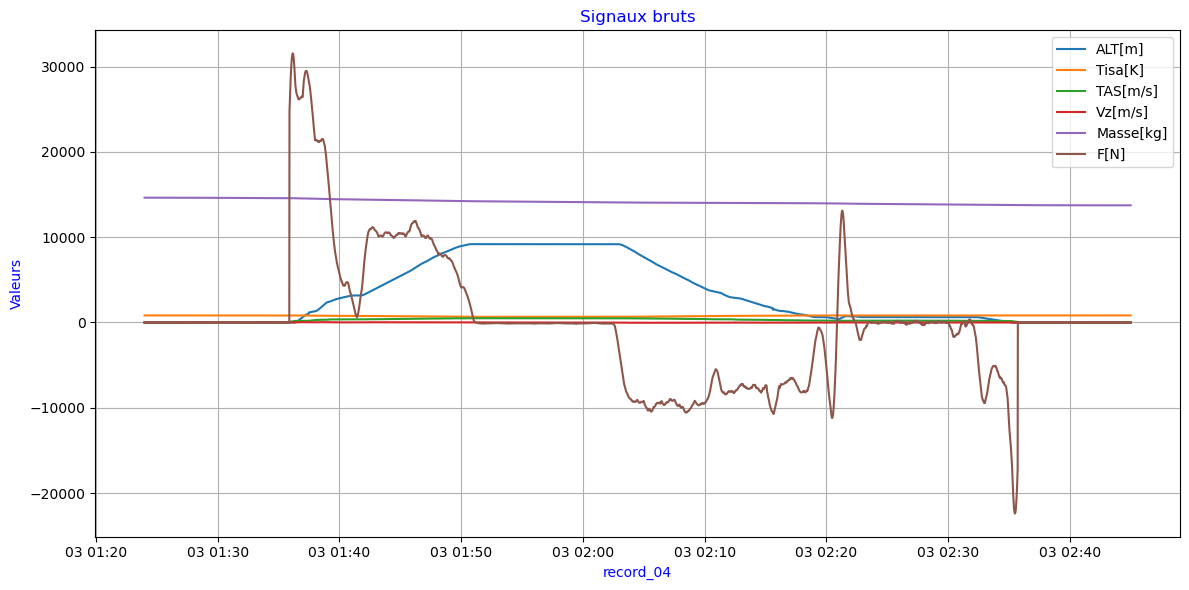

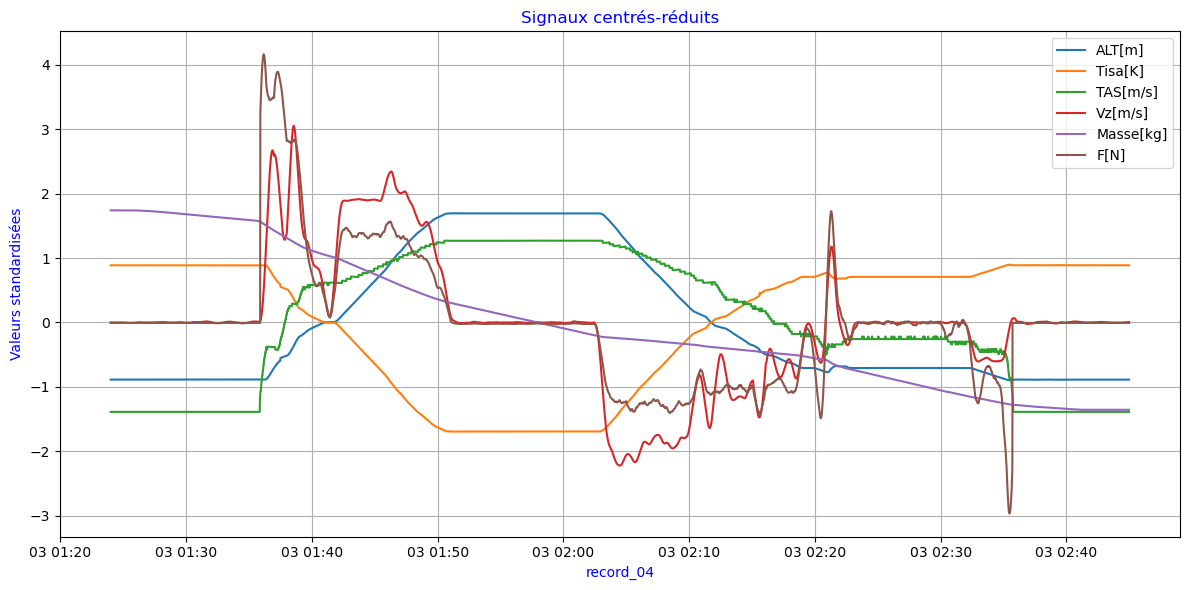

In [18]:
tbt.groupplot_matplotlib(df, title="Signaux bruts")
tbt.groupplot_matplotlib(df, title="Signaux centrés-réduits", standardize=True)

### Affichage superposé de deux sous-graphes liés

In [19]:
tbt.doubleplot(df,'ALT',0.3,title="Simple double plot")

In [20]:
tbt.doubleplot(df[['ALT[m]']],df[['TAS[m/s]','Vz[m/s]']],title="Double plot")

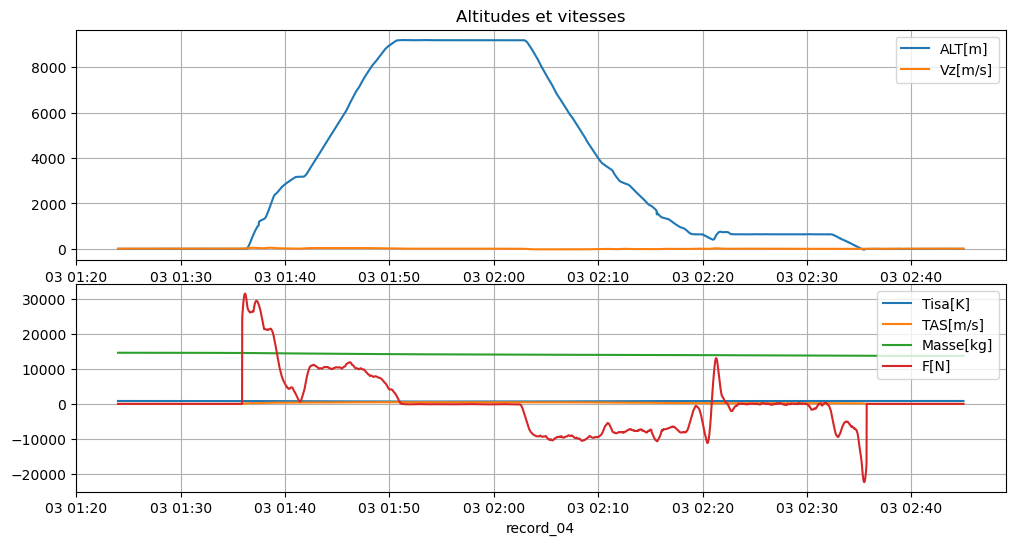

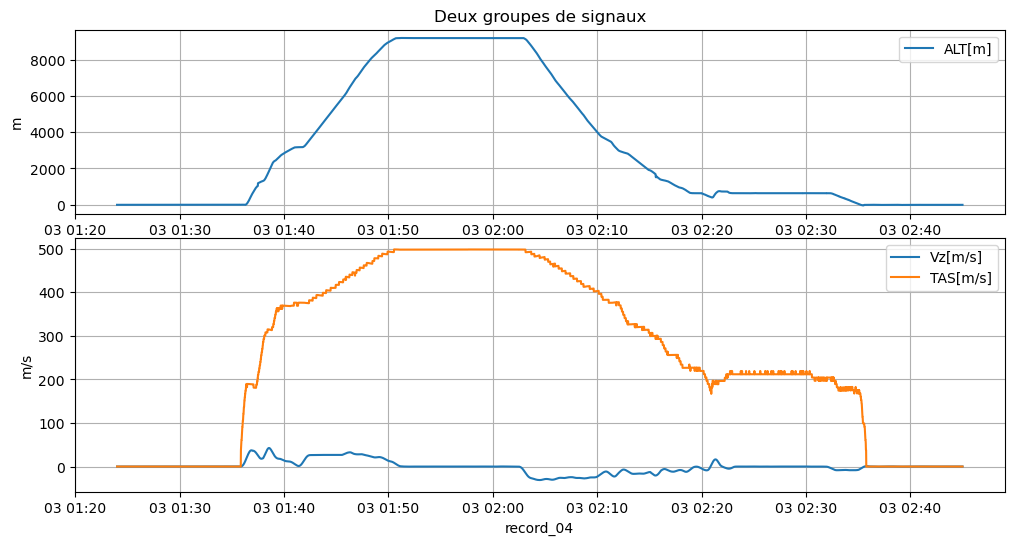

In [21]:
# Cas avec une liste de colonnes à isoler depuis df
tbt.doubleplot_matplotlib(df, ["ALT", "Vz"], title="Altitudes et vitesses")

# Cas avec deux DataFrames explicites
df1 = df[["ALT[m]"]]
df2 = df[["Vz[m/s]", "TAS[m/s]"]]
tbt.doubleplot_matplotlib(df1, df2, p=0.4, title="Deux groupes de signaux")

## Affichage temporel
Cet affichage permet d'observer une partie du signal assez facilement et offre des options de zoom rapides.

In [22]:
tbt.tsplot(df,'ALT',"Altitude")

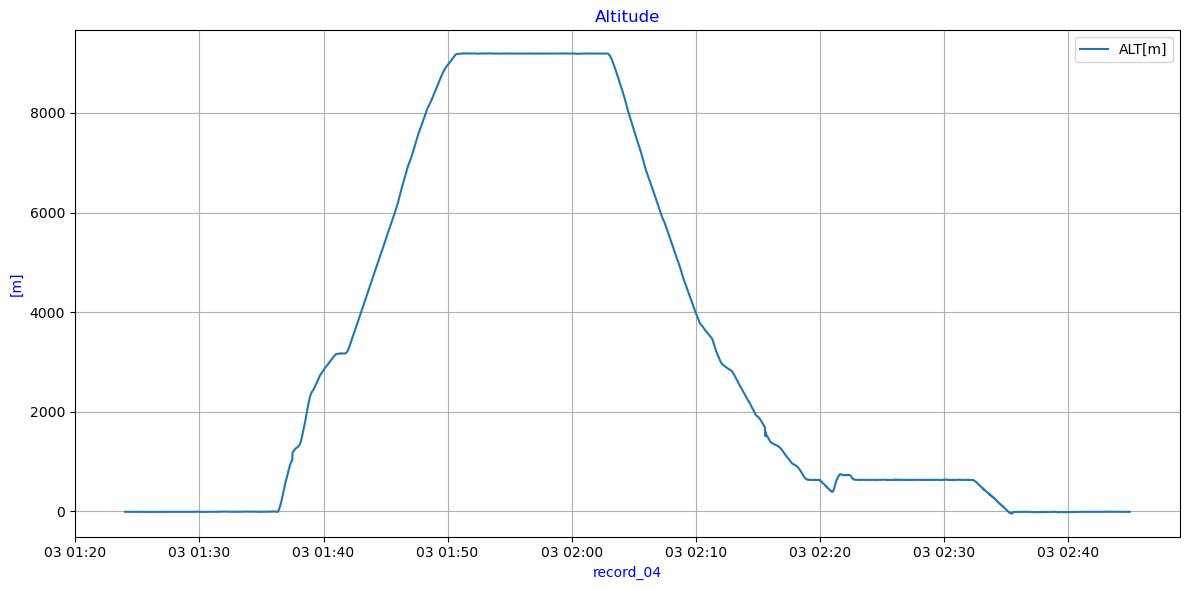

In [23]:
tbt.tsplot_matplotlib(df, "ALT", "Altitude")

## Analyse en composantes principales
L'idée est d'afficher les poids des variables dans le cercle défini par deux composantes principales.

* Le second paramètre de la fonction est soit None, soit une pca établie sur des données standardisées.
* Le troisième paramètre, vaut 0 par défaut, mais s'il est positif et entre 0 et 1, alors un échantillonnage de données est affiché en superposition du graphique.

In [24]:
tbt.pcacircle(df,None,0.5)

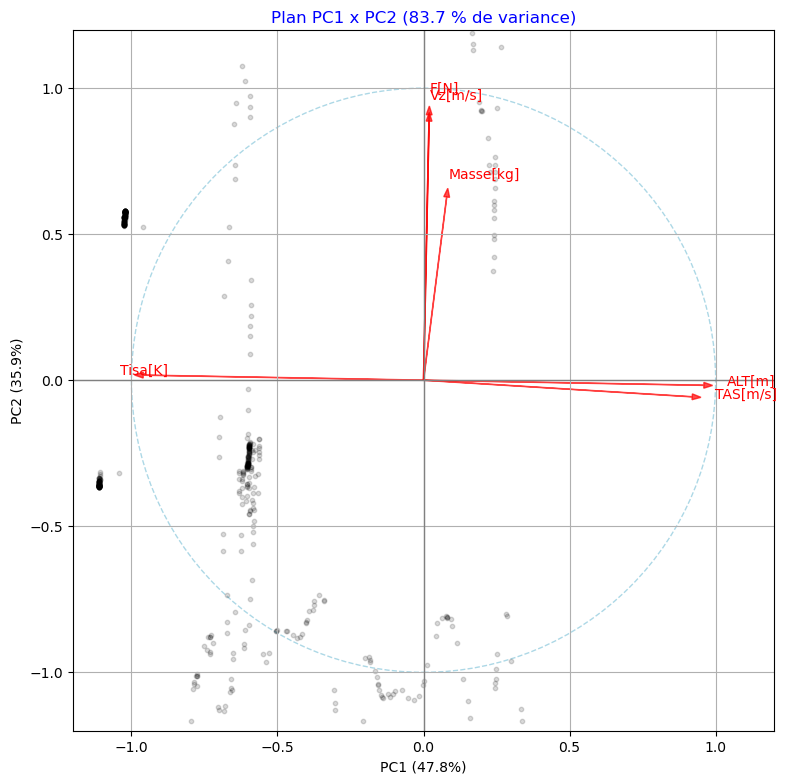

In [25]:
tbt.pcacircle_matplotlib(df, comp1=1, comp2=2, sample=0.2)

_Jérôme Lacaille (YOR)_